In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df_train=pd.read_csv("train.csv")

In [81]:
df_test=pd.read_csv("test.csv")

In [82]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [83]:
df=pd.concat([df_train,df_test],ignore_index=True)
df['Gender'] = df['Gender'].str.strip()

In [84]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [85]:
##replacing categorical value with integers

In [86]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [87]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [88]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [89]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [90]:
df['Age'] = df['Age'].map({'0-17': 1,'18-25':2 ,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+': 7})

In [91]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [92]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [93]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [94]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [95]:
df_city['B']=df_city['B'].astype(int)

In [96]:
df_city['C']=df_city['C'].astype(int)

In [97]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [98]:
df=pd.concat([df,df_city],axis=1)

In [99]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [100]:
##removing the unused columns

In [101]:
df.drop('User_ID',axis=1,inplace=True)

In [102]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [103]:
df.drop('City_Category',axis=1,inplace=True)

In [104]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [105]:
##Missing values

In [106]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [107]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [108]:
df['Product_Category_2'].isnull().sum()

0

In [109]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [110]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [111]:
df['Product_Category_3'].isnull().sum()

0

In [112]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [113]:
#Stay_In_Current_City_Years having the 4+ value Replacing it with 4

In [114]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',' ')

In [115]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 65.8+ MB


In [117]:
# covert object 'Stay_In_Current_City_Years' to integer

In [118]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


In [120]:
#Visualization

AttributeError: 'numpy.int64' object has no attribute 'startswith'

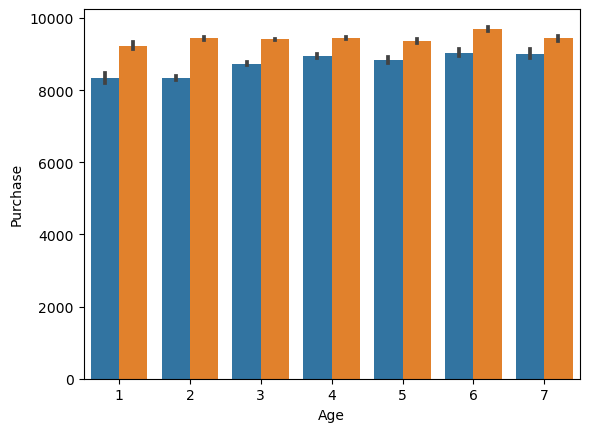

In [121]:
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')
plt.legend()
plt.show()

In [ ]:
#observation purchasing of men is high than women

AttributeError: 'numpy.int64' object has no attribute 'startswith'

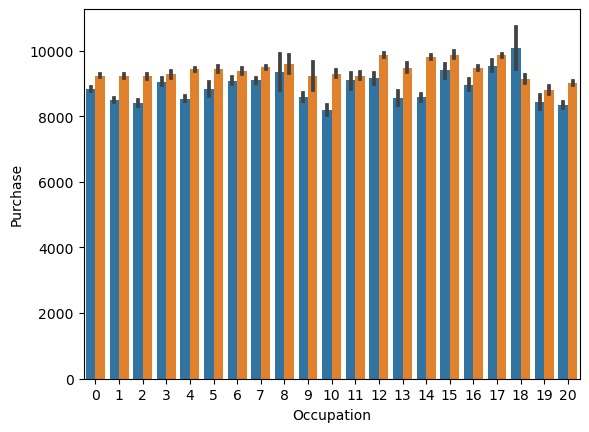

In [122]:
#visualization of purchase with occupation 
sns.barplot(x='Occupation',y='Purchase',data=df,hue='Gender')

In [ ]:
df['Occupation'].unique()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

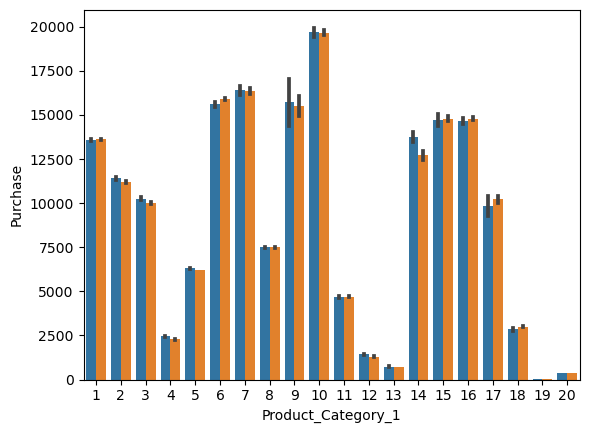

In [123]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df,hue='Gender')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

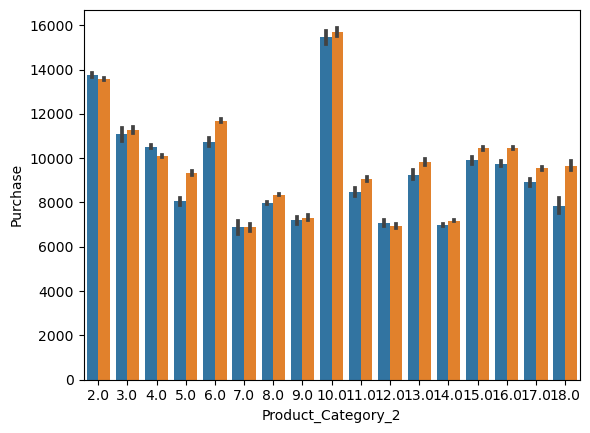

In [124]:
sns.barplot(x='Product_Category_2',y='Purchase',data=df,hue='Gender')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

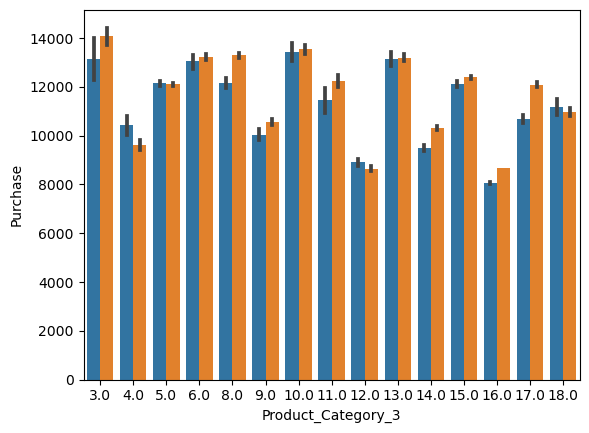

In [125]:
sns.barplot(x='Product_Category_3',y='Purchase',data=df,hue='Gender')

In [129]:
##Feature Scalling
df_test=df[df['Purchase'].isnull()]
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [130]:
df_train=df[~df['Purchase'].isnull()]
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [157]:
X=df_train[:-1]

In [158]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [159]:
X.shape

(550067, 12)

In [160]:
y=df_train['C']

In [161]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: C, dtype: int32

In [162]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [165]:
from sklearn.model_selection import train_test_split


ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined